In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [2]:
X_train = pd.read_csv("prep_Xtrain.csv")
X_test = pd.read_csv("prep_Xtest.csv")
data = pd.read_csv("titanic.csv")

In [3]:
X_train.head()

Pclass  Name  Sex       Age  SibSp     Parch  Ticket      Fare  Cabin  \
0     0.0   0.0  0.0  0.890397  0.125  0.166667     0.0  0.755087    0.0   
1     0.5   0.0  1.0  0.778428  0.125  0.333333     0.0  0.457533    0.0   
2     1.0   0.0  1.0  0.810039  0.000  0.000000     0.0  0.102869    0.0   
3     1.0   0.0  0.0  0.603880  0.000  0.333333     0.0  0.340174    0.0   
4     1.0   0.0  0.0  0.693413  0.000  0.000000     0.0  0.094665    0.0   

   Embarked  
0       1.0  
1       0.0  
2       1.0  
3       1.0  
4       0.5

In [4]:
X_test.head()

Pclass  Name  Sex       Age  SibSp     Parch  Ticket      Fare  Cabin  \
0     1.0   0.0  1.0  0.770651  0.000  0.000000     0.0  0.074217    0.0   
1     1.0   0.0  1.0  0.735920  0.000  0.000000     0.0  0.146366    0.0   
2     0.5   0.0  1.0  0.778428  0.000  0.000000     0.0  0.206395    0.0   
3     1.0   0.0  1.0  0.603880  0.375  0.333333     0.0  0.371353    0.0   
4     1.0   0.0  0.0  0.902691  0.125  0.500000     0.0  0.416434    0.0   

   Embarked  
0       1.0  
1       1.0  
2       1.0  
3       1.0  
4       1.0

In [5]:
y_train = pd.read_csv("prep_ytrain.csv")
y_test = pd.read_csv("prep_ytest.csv")

In [6]:
y_train.head()

Survived
0       0.0
1      -inf
2      -inf
3      -inf
4       0.0

<AxesSubplot:>

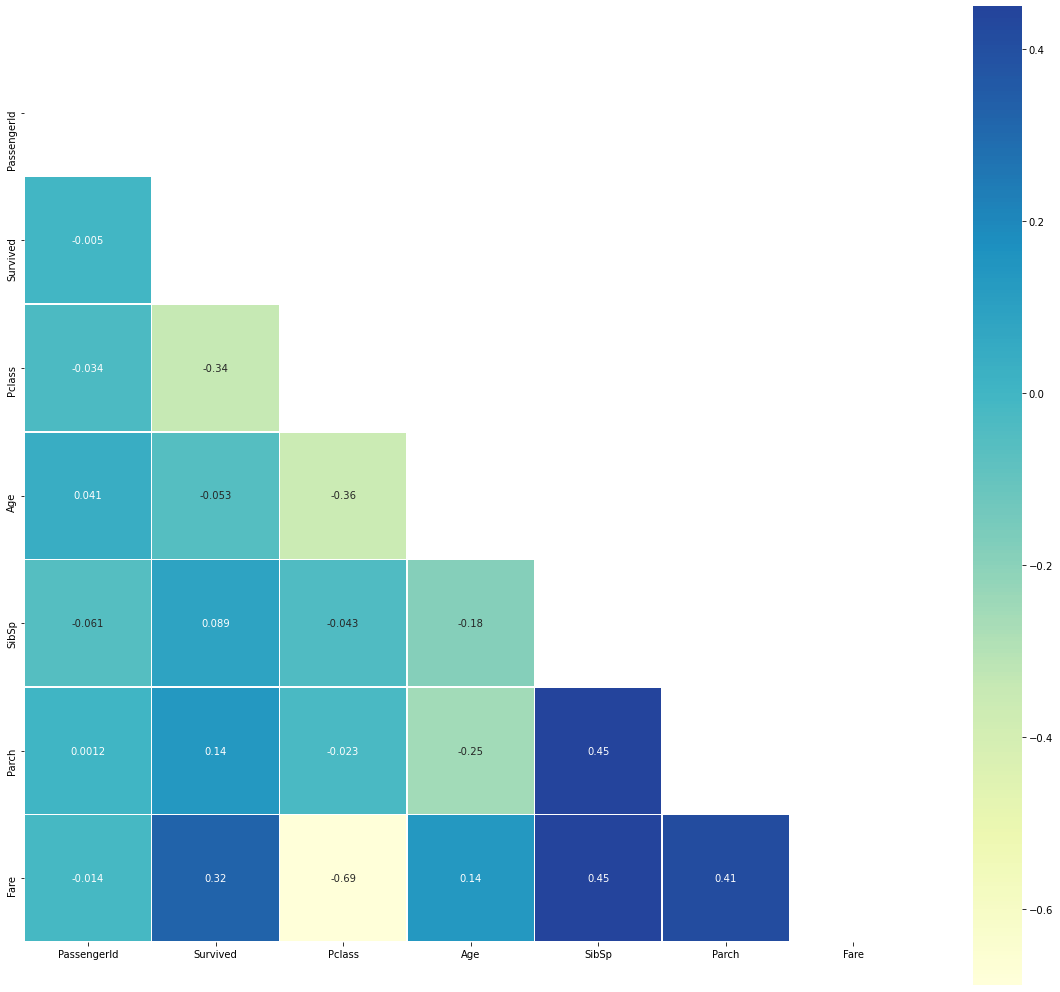

In [7]:
corr = data.corr(method='spearman')
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(20, 18))

sns.heatmap(corr, annot = True, mask=mask, cmap="YlGnBu", center=0,
            square=True, linewidths=.5)

In [8]:
X_train = X_train.loc[:,['SibSp','Parch','Fare']]

In [9]:
X_test=X_test.loc[:,['SibSp','Parch','Fare']]

In [10]:
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test.replace([np.inf, -np.inf], np.nan, inplace=True)

In [11]:
cols_con_na = [col for col in X_test.columns if X_test[col].isnull().mean()>0]
cols_con_na

['Fare']

In [12]:
X_train['Fare'].isnull().mean()

0.018494055482166448

In [13]:
X_train[cols_con_na].dropna()
X_test[cols_con_na].dropna()

Fare
0    0.074217
1    0.146366
2    0.206395
3    0.371353
4    0.416434
..        ...
128  0.138643
129  0.309985
130  0.360640
131  0.244388
133  0.340174

[133 rows x 1 columns]

In [16]:
cols_con_na_y = [col for col in y_train.columns if y_train[col].isnull().mean()>0]
cols_con_na_y

[]

In [18]:
y_test.isnull().mean()

Survived    0.0
dtype: float64

In [21]:
y_train.replace([np.inf, -np.inf], np.nan, inplace=True)
y_test.replace([np.inf, -np.inf], np.nan, inplace=True)

In [19]:
from sklearn.linear_model import LogisticRegression

In [22]:
lr = LogisticRegression().fit(X_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [82]:
X_train.replace([np.inf, -np.inf], np.nan, inplace=True).reshape(-1, 1)
X_test.replace([np.inf, -np.inf], np.nan, inplace=True).reshape(-1, 1)

AttributeError: 'numpy.ndarray' object has no attribute 'replace'

In [81]:
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [8]:
#Objeto selector de variables
sel_ = SelectFromModel(Lasso(alpha=0.001, random_state=0))

sel_.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.001, random_state=0))

In [9]:
sel_.get_support().sum()

38

In [10]:
sel_.get_support()

array([ True,  True, False,  True, False, False, False,  True, False,
        True, False,  True, False, False, False,  True,  True,  True,
       False,  True,  True, False,  True, False,  True, False,  True,
       False,  True,  True, False,  True,  True, False, False, False,
       False, False, False,  True,  True, False,  True,  True, False,
        True,  True, False,  True,  True, False, False,  True,  True,
        True,  True,  True, False, False,  True,  True, False, False,
       False,  True,  True, False, False, False,  True, False, False,
       False, False, False, False,  True,  True])

In [11]:
selected_features = X_train.columns[(sel_.get_support())]

In [12]:
selected_features

Index(['MSSubClass', 'MSZoning', 'LotArea', 'LandContour', 'LotConfig',
       'Neighborhood', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearRemodAdd', 'RoofStyle', 'Exterior1st', 'MasVnrType', 'ExterQual',
       'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC',
       'CentralAir', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageFinish', 'GarageCars', 'PavedDrive',
       'WoodDeckSF', 'ScreenPorch', 'SaleType', 'SaleCondition'],
      dtype='object')

In [13]:
pd.Series(selected_features).to_csv('C:/Users/Paola Méndez/Jupyter/Product Development/selected_features.csv', index=False)

### 4. Entrenamiento del Modelo

In [14]:
X_train = X_train[selected_features]
X_test = X_test[selected_features]

In [15]:
linear_model = Lasso(alpha=0.001, random_state=2022)

#entrenando modelo
linear_model.fit(X_train, y_train)

Lasso(alpha=0.001, random_state=2022)

#### Predicciones

In [17]:
from sklearn.metrics import mean_squared_error, r2_score

In [18]:
preds_train = linear_model.predict(X_train)

In [25]:
preds_test= linear_model.predict(X_test)

In [24]:
#Resultados del Train
print("MSE de entrenamiento: {}".format(mean_squared_error(np.exp(y_train), np.exp(preds_train))))
print("RMSE de entrenamiento: {}".format(mean_squared_error(np.exp(y_train)
                                                            , np.exp(preds_train)
                                                           , squared=False)))
print("R2 de entrenamiento: {}".format(r2_score(np.exp(y_train), np.exp(preds_train))))

MSE de entrenamiento: 824796417.1246818
RMSE de entrenamiento: 28719.269091059436
R2 de entrenamiento: 0.8706117742176254


In [27]:
#Resultados del test
print("MSE de entrenamiento: {}".format(mean_squared_error(np.exp(y_test), np.exp(preds_test))))
print("RMSE de entrenamiento: {}".format(mean_squared_error(np.exp(y_test)
                                                            , np.exp(preds_test)
                                                           , squared=False)))
print("R2 de entrenamiento: {}".format(r2_score(np.exp(y_test), np.exp(preds_test))))

MSE de entrenamiento: 724284468.5495157
RMSE de entrenamiento: 26912.53367019753
R2 de entrenamiento: 0.87770643455346


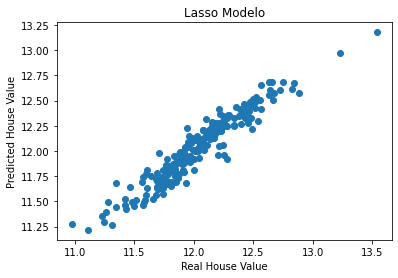

In [28]:
plt.scatter(y_test, preds_test)
plt.xlabel("Real House Value")
plt.ylabel("Predicted House Value")
plt.title("Lasso Modelo")
plt.show()

In [29]:
importance = pd.Series(np.abs(linear_model.coef_.ravel()))
importance.index = selected_features
importance.sort_values(inplace = True, ascending = False)

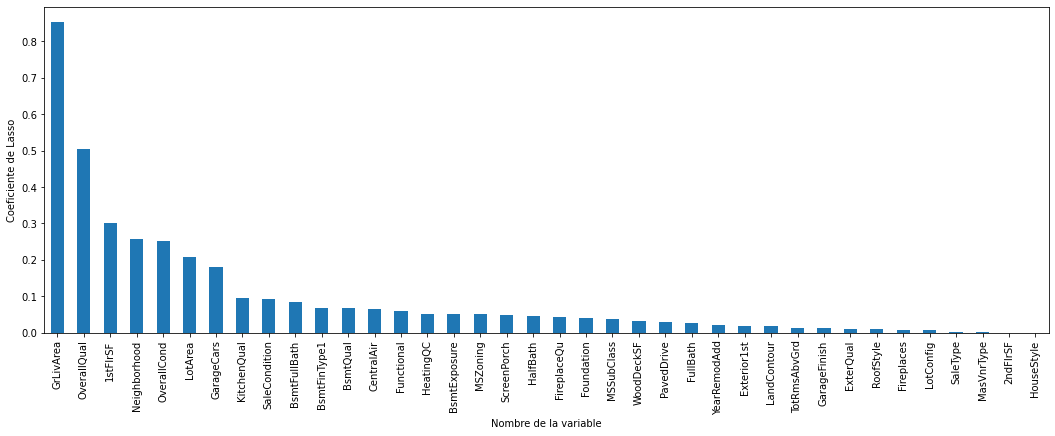

In [31]:
importance.plot.bar(figsize=(18,6))
plt.ylabel("Coeficiente de Lasso")
plt.xlabel("Nombre de la variable")
plt.show()

In [32]:
import joblib

In [35]:
joblib.dump(linear_model, 'C:/Users/Paola Méndez/Jupyter/Product Development/lasso_reg.joblib')

['C:/Users/Paola Méndez/Jupyter/Product Development/lasso_reg.joblib']